In [76]:
import warnings
warnings.filterwarnings('ignore')

# K-Means ML Cluster model

## Importing data

In [50]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/13_kmeans/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Elbow Technique

In [77]:
k_range = range(1, 10)
sse = []
for k in k_range:
    km = KMeans(n_clusters= k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

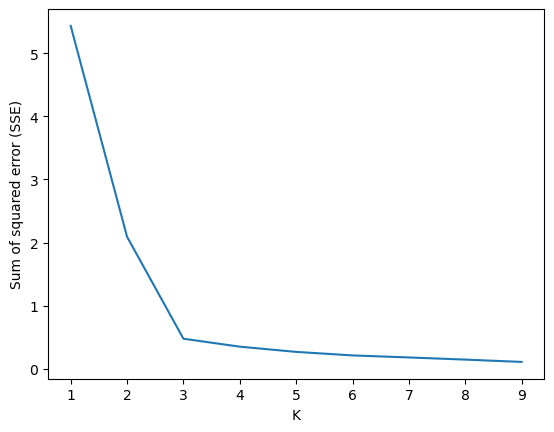

In [78]:
plt.xlabel('K')
plt.ylabel("Sum of squared error (SSE)")
plt.plot(k_range, sse)

# Unscaled/wrong predictions

## Creating initial Scatter Plot

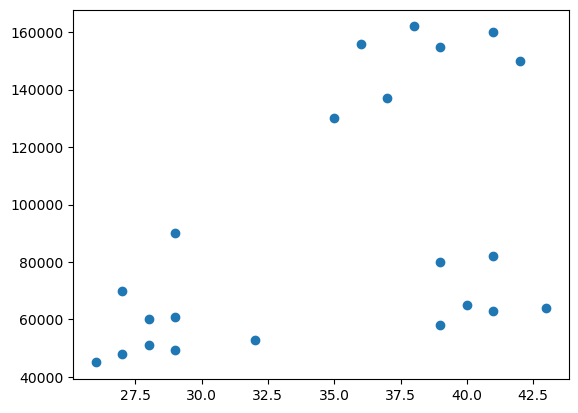

In [51]:
plt.scatter(df['Age'], df['Income($)'])

In [52]:
km = KMeans(n_clusters= 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted
df['cluster'] = y_predicted
df.head()

C:\Users\ab991130\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ab991130\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


## New plot with cluster ID

Text(0, 0.5, 'Income ($)')

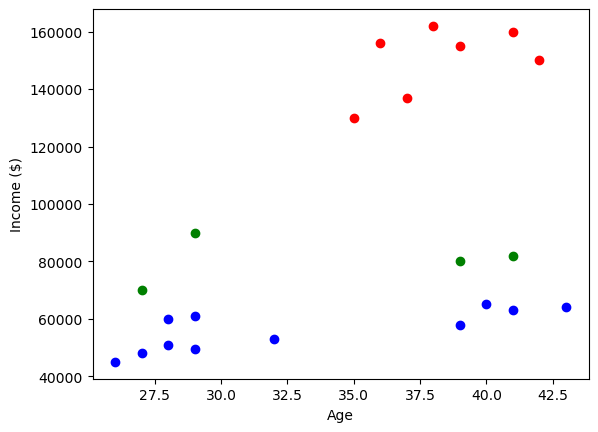

In [53]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='blue')
plt.xlabel('Age')
plt.ylabel('Income ($)')

# Scaled/accurate predictions

## Scaling features (Preprocessing)

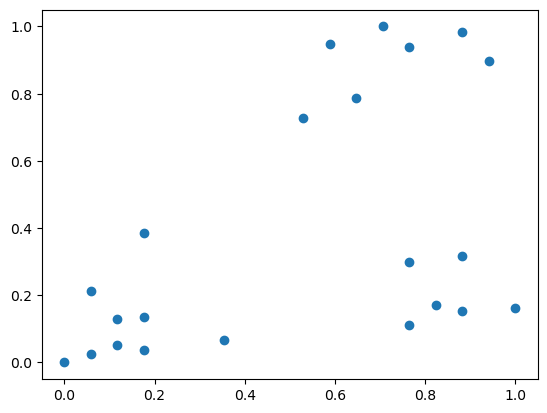

In [64]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform 'Income($)' column
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

# Fit and transform 'Age' column
df['Age'] = scaler.fit_transform(df[['Age']])

plt.scatter(df['Age'], df['Income($)'])

## Predicting new Clusters with new scaled data

In [72]:
km = KMeans(n_clusters= 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted
df['cluster'] = y_predicted
df.head()

C:\Users\ab991130\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ab991130\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


## New plot with marked centroids

Text(0, 0.5, 'Income ($)')

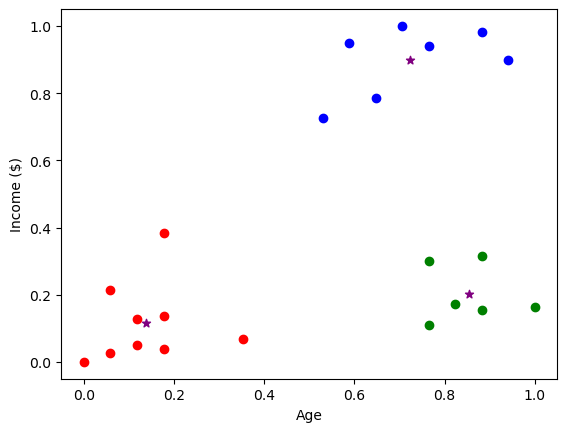

In [70]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')